# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [3]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [4]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 55.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.76MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.21MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [5]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [6]:
model = torch.nn.Linear(28*28, 10)

In [7]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.6344,  0.1044, -1.1045, -0.5649, -0.1328,  0.3413, -0.4051,  0.8804,
          0.0045, -0.2318]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [8]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.1300)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

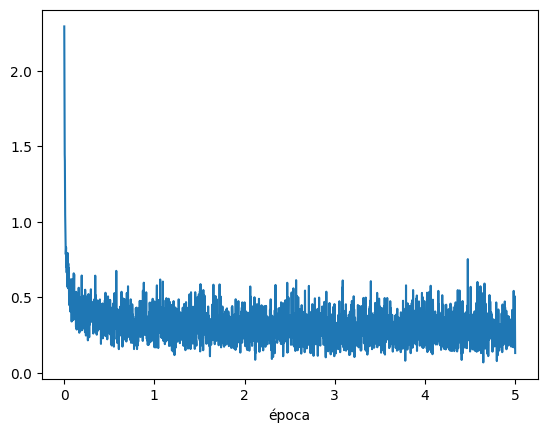

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

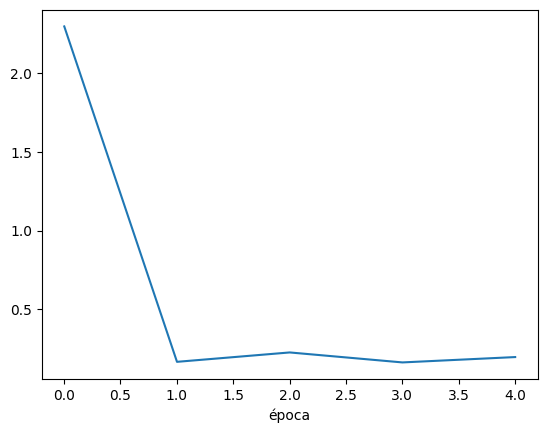

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
<br>`batch_size = 100`

2. Em uma época, quantos mini-batches existem?
<br>Número de minibatches de trenamento: 600

3. Qual é a definição de época?
<br>É um laço de treinamento completo (executa o `predict`, cálculo de perda, `backpropagation` e atualização dos pesos) que passa por todos os mini-batches.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [19]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        if k == len(loader_train) - 1:
          print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')

Época: 1/5, batch: 600
Época: 2/5, batch: 600
Época: 3/5, batch: 600
Época: 4/5, batch: 600
Época: 5/5, batch: 600


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [38]:
def train_model(batch_size):
  dataset_dir = 'MNIST/'
  dataset_train = MNIST(dataset_dir, train=True, download=True,
                        transform=torchvision.transforms.ToTensor())

  loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  print(f'Batch size: {batch_size}')
  print('Número de minibatches de trenamento:', len(loader_train))
  n_batches_train = len(loader_train)

  model = torch.nn.Linear(28*28, 10)
  n_epochs = 5
  learningRate = 0.5

  # Utilizaremos CrossEntropyLoss como função de perda
  criterion = torch.nn.CrossEntropyLoss()

  # Gradiente descendente
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  epochs = []
  losses = []

  total_trained_samples = 0
  for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)

          if k == len(loader_train) - 1:
            # print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')
            print(f'Época: {i+1}/{n_epochs}, Batch: {k+1}, Loss: {loss.data:.6f}')

  fig, axes = plt.subplots(1,2, figsize=(16,5))
  axes[0].plot(epochs, losses)
  axes[0].set_xlabel('Época')
  axes[0].set_ylabel('Perda')
  axes[0].set_title('Perda por época')

  axes[1].plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
  axes[1].set_xlabel('Mini-batch')
  axes[1].set_ylabel('Perda')
  axes[1].set_title('Perda por mini-batch')
  plt.show()

  # return epochs, losses

Batch size: 10
Número de minibatches de trenamento: 6000
Época: 1/5, Batch: 6000, Loss: 0.016193
Época: 2/5, Batch: 6000, Loss: 0.809215
Época: 3/5, Batch: 6000, Loss: 0.029201
Época: 4/5, Batch: 6000, Loss: 0.034990
Época: 5/5, Batch: 6000, Loss: 0.326104


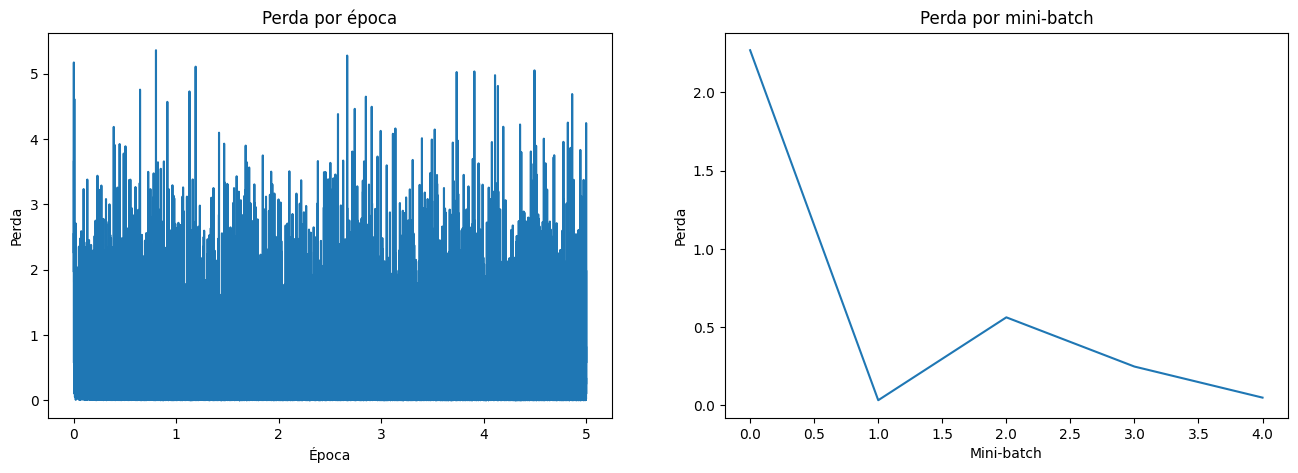

In [41]:
train_model(10)

Batch size: 100
Número de minibatches de trenamento: 600
Época: 1/5, Batch: 600, Loss: 0.319419
Época: 2/5, Batch: 600, Loss: 0.168031
Época: 3/5, Batch: 600, Loss: 0.234215
Época: 4/5, Batch: 600, Loss: 0.311658
Época: 5/5, Batch: 600, Loss: 0.234352


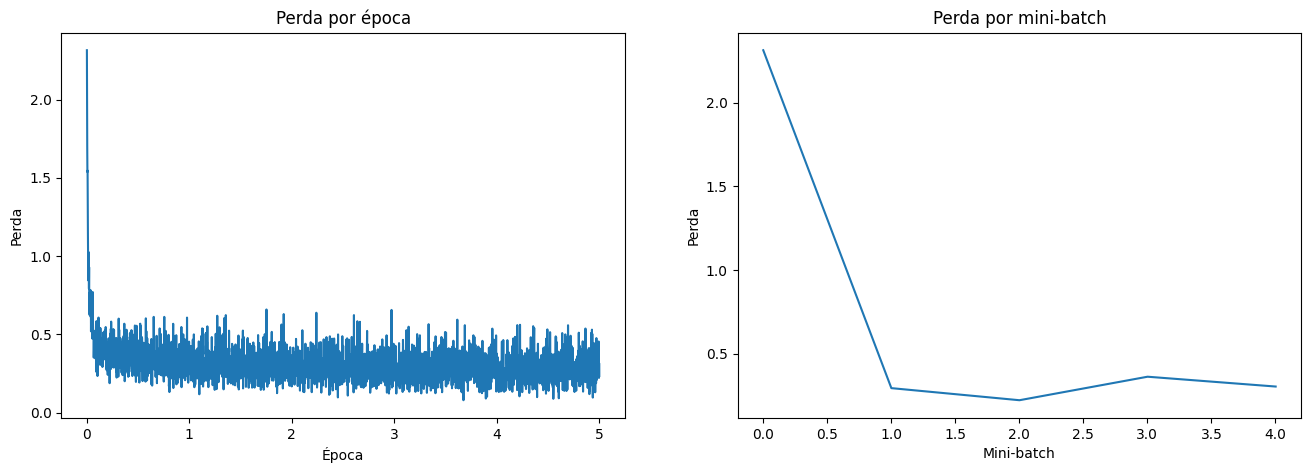

In [40]:
train_model(100)

Batch size: 1000
Número de minibatches de trenamento: 60
Época: 1/5, Batch: 60, Loss: 0.433473
Época: 2/5, Batch: 60, Loss: 0.335501
Época: 3/5, Batch: 60, Loss: 0.362861
Época: 4/5, Batch: 60, Loss: 0.338512
Época: 5/5, Batch: 60, Loss: 0.341288


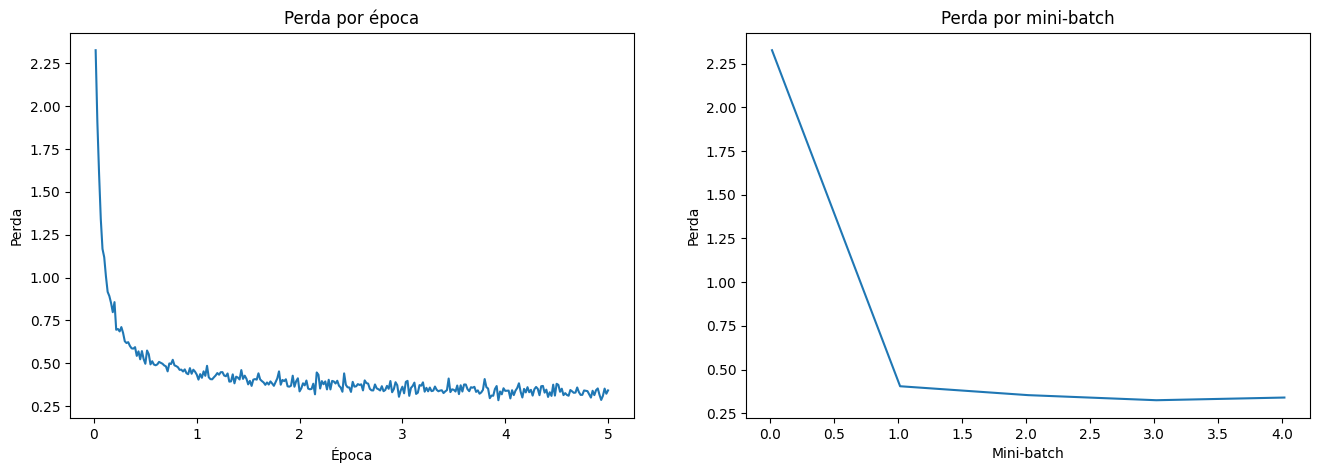

In [39]:
train_model(1000)

## Conclusões sobre os experimentos deste notebook


Quão maior o batch_size, menor a quantidade de mini-batches de treinamento.
<br>Com um batch_size maior o erro convergiu de forma mais rápida e menos oscilatória